## Dividends data

The dividend data will include all the companies dividend historical information, the dividend calendar and the last known dividend price.

In [23]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from yahoo_fin.stock_info import get_dividends
from yahoo_fin.stock_info import get_quote_table

## Historic Dividends

In [24]:
dividend_data = get_dividends("MSFT", "01-01-2018")

In [25]:
print(dividend_data)

            dividend ticker
2018-02-14      0.42   MSFT
2018-05-16      0.42   MSFT
2018-08-15      0.42   MSFT
2018-11-14      0.46   MSFT
2019-02-20      0.46   MSFT
2019-05-15      0.46   MSFT
2019-08-14      0.46   MSFT
2019-11-20      0.51   MSFT
2020-02-19      0.51   MSFT
2020-05-20      0.51   MSFT
2020-08-19      0.51   MSFT
2020-11-18      0.56   MSFT


<AxesSubplot:>

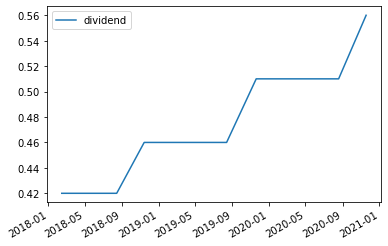

In [26]:
dividend_data.plot()

In [27]:
dividend_data.to_json()

'{"dividend":{"1518566400000":0.42,"1526428800000":0.42,"1534291200000":0.42,"1542153600000":0.46,"1550620800000":0.46,"1557878400000":0.46,"1565740800000":0.46,"1574208000000":0.51,"1582070400000":0.51,"1589932800000":0.51,"1597795200000":0.51,"1605657600000":0.56},"ticker":{"1518566400000":"MSFT","1526428800000":"MSFT","1534291200000":"MSFT","1542153600000":"MSFT","1550620800000":"MSFT","1557878400000":"MSFT","1565740800000":"MSFT","1574208000000":"MSFT","1582070400000":"MSFT","1589932800000":"MSFT","1597795200000":"MSFT","1605657600000":"MSFT"}}'

## Ex-Dividend Date

In [28]:
quote_table = get_quote_table("MSFT")

In [29]:
print(quote_table)

{'1y Target Est': 268.2, '52 Week Range': '132.52 - 240.44', 'Ask': '237.98 x 800', 'Avg. Volume': 29745267.0, 'Beta (5Y Monthly)': 0.83, 'Bid': '237.60 x 800', "Day's Range": '235.09 - 238.00', 'EPS (TTM)': 6.71, 'Earnings Date': 'Apr 27, 2021 - May 03, 2021', 'Ex-Dividend Date': 'Feb 17, 2021', 'Forward Dividend & Yield': '2.24 (0.96%)', 'Market Cap': '1.786T', 'Open': 235.61, 'PE Ratio (TTM)': 35.3, 'Previous Close': 232.9, 'Quote Price': 236.7899932861328, 'Volume': 5791093.0}


In [34]:
print(f"Ex-Dividend Date: {quote_table['Ex-Dividend Date']}")
print(f"Forward Dividend & Yield: {quote_table['Forward Dividend & Yield']}")

Ex-Dividend Date: Feb 17, 2021
Forward Dividend & Yield: 2.24 (0.96%)


## Dividend Payment and alt for Ex-Dividend Date

In [20]:
from alpha_vantage.fundamentaldata import FundamentalData

ts = FundamentalData(key="")
from bson.json_util import dumps
import json

data = ts.get_company_overview(symbol="MSFT")
print(data)

({'Symbol': 'MSFT', 'AssetType': 'Common Stock', 'Name': 'Microsoft Corporation', 'Description': 'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. Its Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, and Skype for Business, as well as related Client Access Licenses (CAL); Skype, Outlook.com, OneDrive, and LinkedIn; and Dynamics 365, a set of cloud-based and on-premises business solutions for small and medium businesses, large organizations, and divisions of enterprises. Its Intelligent Cloud segment licenses SQL and Windows Servers, Visual Studio, System Center, and related CALs; GitHub that provides a collaboration platform and code hosting service for developers; and Azure, a cloud platform. It also offers support services and Microsoft consulting services to assist customers in developing, deploying, and managing Microsoft server and deskto

In [36]:
print(f"Ex-Dividend Date: {json.loads(dumps(data))[0]['ExDividendDate']}")
print(f"Dividend Date: {json.loads(dumps(data))[0]['DividendDate']}")
print(f"Dividend Yield: {json.loads(dumps(data))[0]['DividendYield']}")
print(
    f"Forward Annual Dividend Rate: {json.loads(dumps(data))[0]['ForwardAnnualDividendRate']}"
)

Ex-Dividend Date: 2021-02-17
Dividend Date: 2021-03-11
Dividend Yield: 0.0096
Forward Annual Dividend Rate: 2.24


## JSON Structure

In [1]:
[
    {
        "symbol": "AZN",
        "dividend_ex_date": "2021-02-17",
        "dividend_date": "2021-03-11",
        "dividend_history": [{"1518566400000": 0.42}, {"1605657600000": 0.56}],
        "dividend_yield": 0.0096,
        "forward_annual_dividend_rate": 2.24,
    }
]

[{'symbol': 'AZN',
  'dividend_ex_date': '2021-02-17',
  'dividend_date': '2021-03-11',
  'dividend_history': [{'1518566400000': 0.42}, {'1605657600000': 0.56}],
  'dividend_yield': 0.0096,
  'forward_annual_dividend_rate': 2.24}]

## Database Reference

<table>
  <tr>
    <th>Name</th>
  </tr>
  <tr>
    <td>dividend_fundamentals</td>
  </tr>
</table>

## API Public Methods
<table>
  <tr>
    <th>Method</th>
    <th>Description</th>
    <th>Arguments</th>  
  </tr>
  <tr>
    <td>get_dividend</td>
    <td>Return full dividend object</td>
    <td>symbol</td>
  </tr>
  <tr>
    <td>get_dividend_dates</td>
    <td>Return dividend date and ex-dividend</td>
    <td>symbol</td>
  </tr> 
  <tr>
    <td>get_dividend_history</td>
    <td>Return dividend history, provide date for for upwards range</td>
    <td>symbol, date=None</td>
  </tr>      
</table>

## Getter Requirements

- Create get_dividends_fundamentals.py 
- Pull dividend fundamentals
- Limit the pull based on Company Details table and Established rates
- linking id: symbol